In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
from copy import copy
from pathlib import Path
from utils.general import LOGGER, clip_boxes, increment_path, xywh2xyxy, xyxy2xywh

C:\Users\82106\AppData\Local\Temp\ipykernel_36308\910124912.py:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [ ]:
df = pd.read_csv('C://2024GEP/c_results.csv')

In [5]:
print(df.head(2))


               epoch     train/box_loss     train/obj_loss     train/cls_loss  \
0                  0            0.11831            0.10518           0.044897   
1                  1            0.10376            0.12523           0.042492   

   metrics/precision  ...       val/obj_loss       val/cls_loss  \
0           0.007359  ...            0.10356           0.047252   
1           0.118230  ...            0.11442           0.043243   

               x/lr0              x/lr1              x/lr2  
0           0.081100           0.002100           0.002100  
1           0.061257           0.004257           0.004257  

[2 rows x 14 columns]


In [6]:
def plot_results1(file='path/to/results.csv', save_dir=''):
    # Load results.csv file
    data = pd.read_csv(file)
    
    # Create plots
    fig, ax = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)
    ax = ax.ravel()
    
    # Titles and labels
    titles = ['Box Loss', 'Objectness Loss', 'Classification Loss', 'Precision', 'Recall', 
              'mAP@0.5', 'mAP@0.5:0.95', 'Val Box Loss', 'Val Objectness Loss', 'Val Classification Loss']
    labels = ['train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 
              'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss']

    # Plot data
    for i in range(10):
        y = data.iloc[:, i + 1].values  # Select column (skip first epoch column)
        ax[i].plot(y, marker='.', label=labels[i])
        ax[i].set_title(titles[i])
        ax[i].legend()
    
    # Save plots
    fig.savefig(f'{save_dir}/results.png', dpi=200)
    plt.close(fig)

In [7]:
plot_results1('C://2024GEP/c_results.csv', '.')

In [31]:
def plot_results(file="path/to/results.csv", dir=""):
    """
    Plots training results from a 'results.csv' file; accepts file path and directory as arguments.

    Example: from utils.plots import *; plot_results('path/to/results.csv')
    """
    save_dir = Path(file).parent if file else Path(dir)
    fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    files = list(save_dir.glob("results*.csv"))
    print(files)
    assert len(files), f"No results.csv files found in {save_dir.resolve()}, nothing to plot."
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            print(s)
            x = data.values[:, 0]
            print(x)
            for i, j in enumerate([1, 2, 3, 4, 5, 8, 9, 10, 6, 7]):
                y = data.values[:, j].astype("float")
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker=".", label=f.stem, linewidth=2, markersize=8)  # actual results
                ax[i].plot(x, gaussian_filter1d(y, sigma=3), ":", label="smooth", linewidth=2)  # smoothing line
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.info(f"Warning: Plotting error for {f}: {e}")
    ax[1].legend()
    fig.savefig(save_dir / "11results.png", dpi=200)
    plt.close()

In [32]:
plot_results('C://2024GEP/c_results.csv')

[WindowsPath('C:/2024GEP/results11.csv')]
['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']
[          0           1           2           3           4           5           6           7           8           9          10          11          12          13          14          15          16          17          18          19          20          21          22          23          24          25
          26          27          28          29          30          31          32          33          34          35          36          37          38          39          40          41          42          43          44          45          46          47          48          49          50          51
          52          53          54          55          56          57          58          59          60   

In [51]:
def plot_results2(file="path/to/results.csv", dir=""):
    """
    Plots training results from a 'results.csv' file; accepts file path and directory as arguments.

    Example: from utils.plots import *; plot_results('path/to/results.csv')
    """
    save_dir = Path(file).parent if file else Path(dir)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
    ax = ax.ravel()
    files = list(save_dir.glob("results*.csv"))
    assert len(files), f"No results.csv files found in {save_dir.resolve()}, nothing to plot."
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate([3, 7]):
                y = data.values[:, j].astype("float")
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker=".", label=f.stem, linewidth=2, markersize=8)  # actual results
                ax[i].plot(x, gaussian_filter1d(y, sigma=3), ":", label="smooth", linewidth=2)  # smoothing line
                # ax[i].set_title(s[j], fontsize=25)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.info(f"Warning: Plotting error for {f}: {e}")
    # ax[1].legend()
    fig.savefig(save_dir / "33results.png", dpi=200)
    plt.close()

In [3]:
def plot_r(file="path/to/results.csv", dir="", num=3):
    save_dir = Path(file).parent if file else Path(dir)
    files = list(save_dir.glob("results*.csv"))
    for f in files:
        data = pd.read_csv(f)
        s = [x.strip() for x in data.columns]
        x = data.values[:, 0]
        
        y = data.values[:, num].astype("float")
        plt.plot(x, y, marker=".", label=f.stem, linewidth=2, markersize=8)  # actual results
        plt.plot(x, gaussian_filter1d(y, sigma=3), ":", label="smooth", linewidth=2)  # smoothing line
    plt.savefig(save_dir / f"44results_{num}.png", dpi=200)
    plt.show()

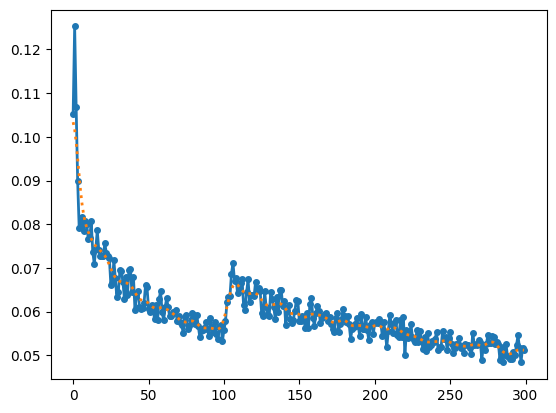

In [8]:
# 차트에 들어간거 num=3, 7
plot_r('C://2024GEP/c_results.csv', num=2)

In [52]:
plot_results2('C://2024GEP/c_results.csv')

In [ ]:
plt.plot()

In [67]:
def plot_results3(file="path/to/results.csv", dir=""):
    """
    Plots training results from a 'results.csv' file; accepts file path and directory as arguments.

    Example: from utils.plots import *; plot_results('path/to/results.csv')
    """
    save_dir = Path(file).parent if file else Path(dir)
    fig, ax = plt.subplots(1, 1, figsize=(12, 10), tight_layout=True)
    # ax = ax.ravel()
    files = list(save_dir.glob("results*.csv"))
    assert len(files), f"No results.csv files found in {save_dir.resolve()}, nothing to plot."
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate([3]):
                y = data.values[:, j].astype("float")
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker=".", label=f.stem, linewidth=2, markersize=8)  # actual results
                ax[i].plot(x, gaussian_filter1d(y, sigma=3), ":", label="smooth", linewidth=2)  # smoothing line
                # ax[i].set_title(s[j], fontsize=25)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.info(f"Warning: Plotting error for {f}: {e}")
    # ax[1].legend()
    fig.savefig(save_dir / "55results.png", dpi=200)
    plt.close()

In [66]:
plot_results3('C://2024GEP/c_results.csv')